### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st

Подключил необходимые библиотеки.

In [2]:
data = pandas.read_csv('/datasets/games.csv')

Загрузил файл с базой данных и сохранил ее в переменную data

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Просмотрел как выглядит таблица  
16715 строк и 11 столбцов в исходном датасете

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Просмотрел количество признаков.

### Шаг 2. Подготовка данных. 

In [5]:
data.duplicated().sum()

0

Проверил количество явных дубликатов

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Проверил количество пропущенных значений

In [7]:
data.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

Количество уникальных значений

In [8]:
data.columns = data.columns.str.lower()

Переименовал столбцы, привел все названия к нижнему регистру

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверил, что все столбцы переименовались

In [10]:
data['name'].isna().sum()

2

**data** - Проверил Nan, нашел пропущенные значения

In [11]:
data = data.dropna(subset=['name']).reset_index(drop=True)

**data** - удалил Nan

In [12]:
data['name'].isna().sum()

0

**data** - Убедился в отсутствии пропусков

In [13]:
data['platform'].isna().sum()

0

**platform** - Проверил Nan, не нашел аномальные значения и пропущенные значения

In [14]:
data['year_of_release'].isna().sum()

269

**year_of_release** - Проверил Nan, нашел пропущенные значения

In [15]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

**year_of_release** - удалил Nan

In [16]:
data['year_of_release'].isna().sum()

0

**year_of_release** - Убедился в отсутствии пропусков

In [17]:
data['year_of_release'] = data['year_of_release'].astype(int)

**year_of_release** - Изменил тип данных столбца на int

In [18]:
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16439    2016
16440    2006
16441    2016
16442    2003
16443    2016
Name: year_of_release, Length: 16444, dtype: int32

**year_of_release** - проверил что тип данных int, данные выводятся правильно

In [19]:
data['genre'].isna().sum()

0

**genre** - Проверил Nan, не нашел аномальные значения и пропущенные значения

In [20]:
data['na_sales'].isna().sum()

0

**na_sales** - Проверил Nan, не нашел аномальные значения и пропущенные значения

In [21]:
data['eu_sales'].isna().sum()

0

**eu_sales** - Проверил Nan, не нашел аномальные значения и пропущенные значения

In [22]:
data['jp_sales'].isna().sum()

0

**jp_sales** - Проверил Nan, не нашел аномальные значения и пропущенные значения

In [23]:
data['other_sales'].isna().sum()

0

**other_sales** - Проверил Nan, не нашел аномальные значения и пропущенные значения

In [24]:
data['critic_score'].isna().sum()

8461

**critic_score** - Обнаружил Nan, принял решение ничего не делать с Nan

In [26]:
data['user_score'].isna().sum()

6605

**user_score** -  Обнаружил Nan

In [27]:
data['user_score'] = data['user_score'].str.replace('tbd', '-1')

**user_score** -  Заменил строковые значения tbd на значение -1

In [29]:
data['user_score'] = data['user_score'].astype(float)

**user_score** - изменил тип данных на float

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


**user_score** - проверил, что тип данных изменился на float64

In [31]:
data['rating'].isna().sum()

6676

**rating** - Обнаружил Nan

In [32]:
data['rating'] = data['rating'].fillna('abc') 

**rating** - заменил все пропуски на значение abc

In [33]:
data['rating'].isna().sum()

0

**rating** - повторно убедился в отсутсвии пропусков

### Замена типа данных  
**year_of_release** заменил на int, что-бы убрать плавающую точку;  
**user_score** заменил на float, что-бы можно было работать со строчкой как с числом.

### Обработка пропусков

#### Почему заполнили пропуски попуски определенным образом
**year_of_release** - удалил 269 записей с пропусками, низкий процент потери, не изменит результат анализа;  
**critic_score** - заменил данные на медианные по данному столбцу;  
**user_score** - заменил данные на медианные по данному столбцу;  
**rating** - заменил все пропуски на значение abc.

#### Причины которые привели к пропускам
Основной причиной пропусков в столбцах **rating, user_score, critic_score** считаю отсутсвие данных практически до 2000 года, вероятнее всего до 2000 года данные не собирались.

#### Аббревиатура tdb  
Строки, которые имели значение tdb я заменил на значение "-1" а весь столбец перевел к типу данных **float**, что-бы можно было работать со строчкой как с числом, но всегда иметь возможность сделать выборку по значениям tdb.

In [34]:
data['full'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**full** - посчитал суммарные продажи во всех регионах, значения сохранил в столбце full

### Шаг 3. Исследовательский анализ данных. 

#### 3.1

In [35]:
years = data.groupby(by='year_of_release')['name'].count()
years.head(10)

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
1985    14
1986    21
1987    16
1988    15
1989    17
Name: name, dtype: int64

Сгруппировал data по году выпуска и посчитал количество игр за каждый год. Посмотрел первые 10 значений.

#### Важны ли данные за весь период  
Данные за весь период важны, они помогут увидеть как менялось количество выпускаемых игры с каждым годом.  
Больше всего игры дл всех платформ выпускалось с 2006 по 2011 г.

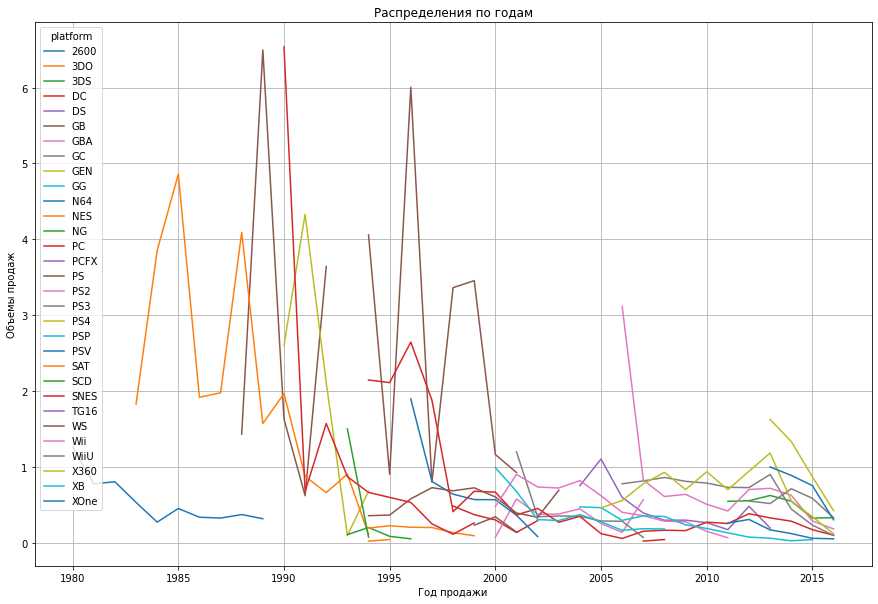

In [36]:
data.pivot_table(index='year_of_release', columns='platform', values='full').plot(grid=True, figsize=(15,10));
plt.title('Распределения по годам')
plt.xlabel('Год продажи')
plt.ylabel('Объемы продаж')
plt.show()

#### 3.2

In [37]:
platform = data.groupby(by='platform')['full'].sum().sort_values(ascending=False)
platform.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: full, dtype: float64

Сгруппировал data по платформам и по количеству продаж, отсортировал данные по возростанию. Посмотрел первые 10 значений.

In [38]:
full_price_platform = data.query("platform==['PS2', 'X360', 'PS3','Wii','DS','PS','PS4','GBA','PSP','3DS']")

Выбрал Топ-10 платформ

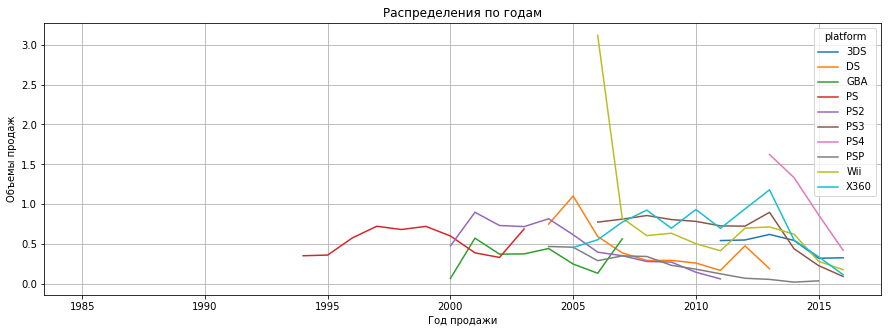

In [39]:
full_price_platform.pivot_table(index='year_of_release', columns='platform', values='full').plot(grid=True, figsize=(15,5));
plt.title('Распределения по годам')
plt.xlabel('Год продажи')
plt.ylabel('Объемы продаж')
plt.show()

Построил график распределения по годам, для графика выбрал выбрал Топ-10 платформ.  
По графику видно: 

1. С 1994 по 2003 годы стали продаваться игры на платформу PS, доля продаж не очень высокая, но стабильная;
2. В 2000 году появились сразу две платформы, это PS2 и GBA. Игры для PS2 были в продаже 12 лет, а вот GBA только 8.
3. В 2004 года в продаже появились игры для платформы DS и продажи начали рости, но после 2005 года продажи упали, в 2012 году заметен небольшой рост продаж, далее судя по данным платформа прекратила сущестовавание;  
4. С 2004 по 2015 выходили игры для платформы PSP, после 2012 года заметен спат, который привел к нулевым продажам в 2015 году; 
5. В 2007 году появились игры для платформы Wii и сразу заняли лидирующие позиции по продажам, но к 2007 году продажи упали и продолжали падать до 2012 года;
6. Так же в 2007 году вышли игры на платформах PS3 и X360, данные по ним распределились распределились примерно одинаково;  
7. С 2012 года в пролаже появились игры для платформы 3DS, эта платформа делила продажи с Wii, но так же как и по многим платформам заметен спад продаж в 2015 году;  
8. С 2013 года в продаже появились игры для платформы PS4, который сразу заняли лидирующую позицию по продажам игры в этом году, к 2016 году мы наблюдаем спад по продажам, далее данные отсутствуют.  

По всем платформам наблюдается подъем уровня продаж в период с 2012 по 2014 год.


In [40]:
yearsabc = pd.pivot_table(data, index='platform', values='year_of_release', aggfunc=pd.Series.nunique)
display(yearsabc.sort_values(by='year_of_release', ascending=False))

,year_of_release
platform,
PC,26
GB,13
NES,12
X360,12
PSP,12
PS2,12
Wii,11
DS,11
PS3,11


Построил таблицу, по который определили сколько лет продавались игры для каждой платформы.  
Из таблицы сразу выделились лидеры: PC, GB, NES и X360.

In [41]:
print('Средний срок появления новых и исчезновения старых платформ', yearsabc.mean());

Средний срок появления новых и исчезновения старых платформ year_of_release    7.677419
dtype: float64


Определил средний срок существования платформ, который составил 7,6 лет.

#### 3.3 
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

#### 3.4

In [42]:
data_34 = data.query('2013<year_of_release<2017') # выбрал даннные за 2013-2017 годы.

Выбрал данные с 2014-2016 годы, т.к примерно с 2012-2014 были заметны подъемы продаж по всем платформам а далее был спад, считаю что данные получатся усредненными и по ним получится сделать более точный прогноз.  

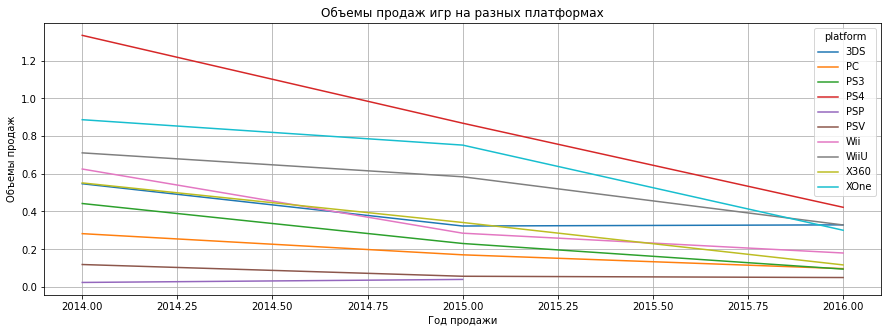

In [43]:
data_34.pivot_table(index='year_of_release', columns='platform', values='full').plot(grid=True, figsize=(15,5));
plt.title('Объемы продаж игр на разных платформах')
plt.xlabel('Год продажи')
plt.ylabel('Объемы продаж')
plt.show()

Построил график, для оценки данных. 
По графику мы видим, что самый высокий уровень продаж был у PS4;  
На втором месте расположилась платформа XOne.  
На третьем месте Wii.  

#### 3.5

In [44]:
data_35 = data_34.pivot_table(index='platform', values='full', aggfunc=('count', 'mean'))
print(data_35.sort_values(by='mean', ascending=False))
print()
print(data_35.query('mean == mean.max()'))

          count      mean
platform                 
PS4         376  0.766356
XOne        228  0.615614
WiiU         73  0.588767
Wii          11  0.460909
X360        111  0.434414
3DS         212  0.408868
PS3         219  0.311324
PC          151  0.179139
PSV         295  0.075932
PSP          13  0.027692

          count      mean
platform                 
PS4         376  0.766356


Из проведенного анализа, я делаю вывод, что потенциально прибыльными платформами являются PS4 и XOne.  
X360 не стоит рассматривать, т.к. платформа устарела.

#### 3.6

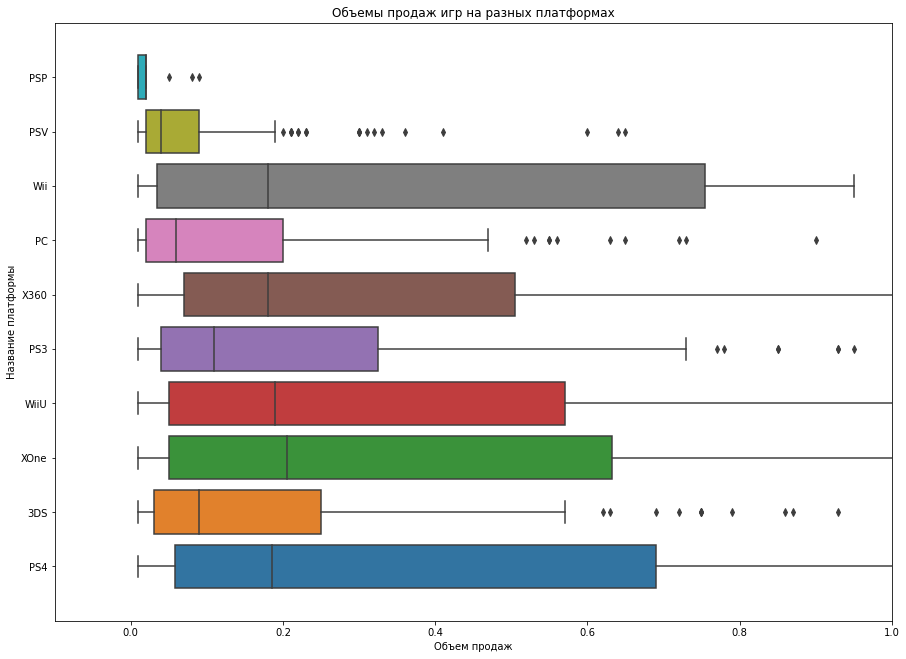

In [45]:
plt.figure(figsize=(15, 11))
sns.boxplot(x='full', y='platform', data=data_34);
plt.xlim(-0.1, 1)
plt.ylim(-1, 10)

plt.title('Объемы продаж игр на разных платформах')
plt.xlabel('Объем продаж')
plt.ylabel('Название платформы')
plt.show()

Из построенного графика я вижу, большая часть проданных игр по платформам находится в пределах 1 млн. копий.  
Как и раньше, мы видим, что в списке лидирующих платформ находится PS4 и XOne.

#### 3.7

In [46]:
ps4 = data_34.query('platform=="PS4"')

Подготовил срез для платформы PS4.

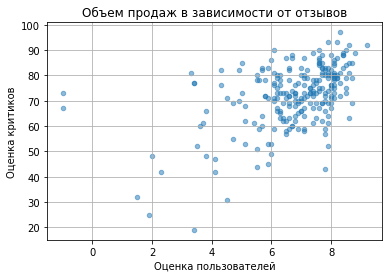

In [47]:
ps4.plot(x='user_score', y='critic_score', grid=True, kind='scatter', alpha = 0.5);
plt.title('Объем продаж в зависимости от отзывов')
plt.xlabel('Оценка пользователей')
plt.ylabel('Оценка критиков')
plt.show()

In [48]:
print('Корреляция',ps4['user_score'].corr(ps4['critic_score']))

Корреляция 0.49247305525300206


Из построенного графика я вижу очень слабую корреляцию.   
Критерий рейтинга расположился примерно одинаково, чем больше был рейтинг пользователей, тем больше был рейтинг критиков.  

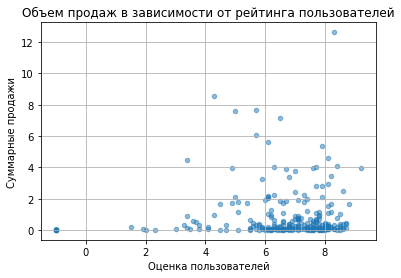

In [49]:
ps4.plot(x='user_score', y='full', grid=True, kind='scatter', alpha = 0.5);
plt.title('Объем продаж в зависимости от рейтинга пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

In [50]:
print('Корреляция',ps4['user_score'].corr(ps4['full']))

Корреляция 0.024999177810042097


Из построенного графика я вижу отсутствие корреляции.   
Продажи не зависили от рейтинга пользователей.

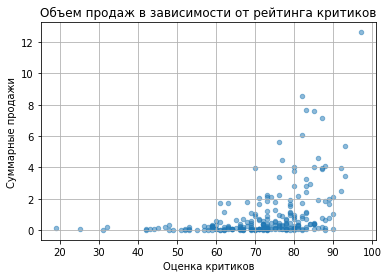

In [51]:
ps4.plot(x='critic_score', y='full', grid=True, kind='scatter', alpha = 0.5);
plt.title('Объем продаж в зависимости от рейтинга критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()

In [52]:
print('Корреляция',ps4['critic_score'].corr(ps4['full']))

Корреляция 0.40266141068104083


Из построенного графика я вижу очень слабую корреляцию.   
Продажи практически не зависили от рейтинга критиков.

#### 3.8

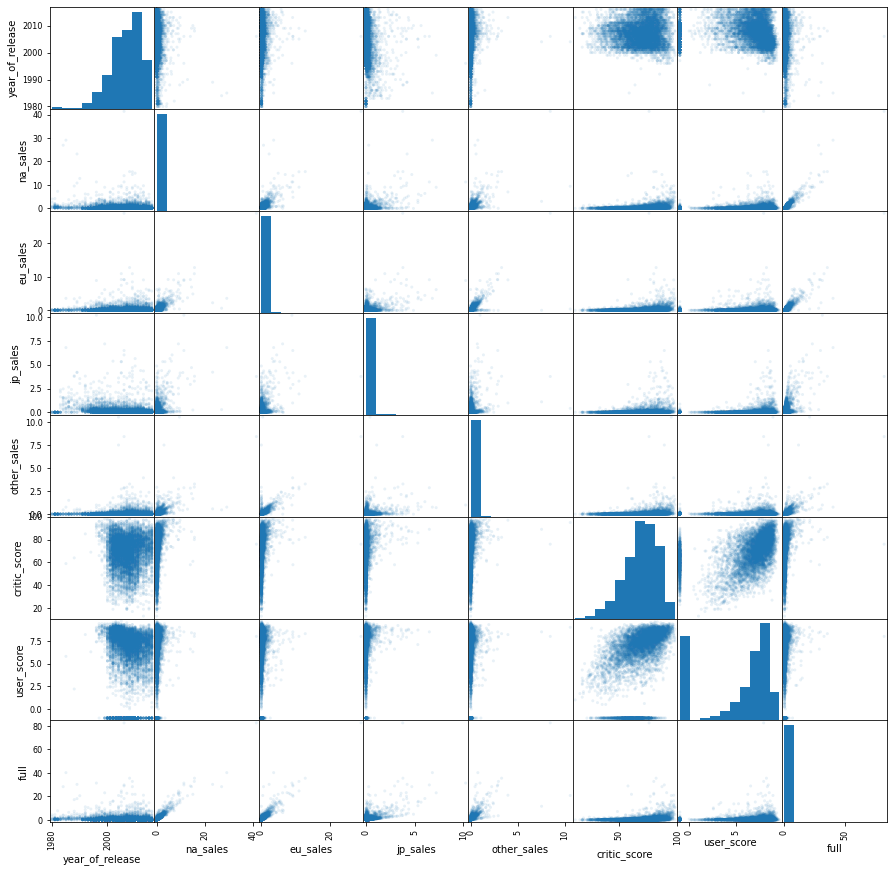

In [53]:
pd.plotting.scatter_matrix(data, alpha = 0.1, figsize=(15,15));

In [54]:
print('Корреляция',data['user_score'].corr(data['full']))

Корреляция 0.16384505191829438


Из построенного графика я вижу очень слабую корреляцию.   
Продажи практически не зависили от рейтинга пользователей.

In [55]:
print('Корреляция',data['critic_score'].corr(data['full']))

Корреляция 0.24534884547411437


Из построенного графика я вижу очень слабую корреляцию.   
Продажи практически не зависили от рейтинга критиков.

In [56]:
print('Корреляция',data['user_score'].corr(data['critic_score']))

Корреляция 0.4422689032367121


Из построенного графика я вижу слабую корреляцию.
Критерий рейтинга расположился примерно одинаково, чем больше был рейтинг пользователей, тем больше был рейтинг критиков.

Из проделанного анализа, я вижу, что больше всего зависимость между рейтингом пользователей и критиков.

#### 3.9

In [57]:
data_39 = data.pivot_table(index='genre', values='full', aggfunc=('count', 'mean'))
print(data_39.sort_values(by='mean', ascending=False))
print()
print('Жанр с высокими продажами', data_39.query('mean == mean.max()'))
print()
print('Жанр с низкими продажами', data_39.query('mean == mean.min()'))

              count      mean
genre                        
Platform        878  0.940262
Shooter        1296  0.803519
Role-Playing   1481  0.628683
Racing         1226  0.590122
Sports         2306  0.567940
Fighting        837  0.528865
Action         3307  0.519057
Misc           1721  0.459204
Simulation      857  0.452695
Puzzle          569  0.421599
Strategy        673  0.256419
Adventure      1293  0.180456

Жанр с высокими продажами           count      mean
genre                    
Platform    878  0.940262

Жанр с низкими продажами            count      mean
genre                     
Adventure   1293  0.180456


Из проведенного анализа, я делаю вывод, что самые прибыльные жанры это **platform** и **shooter**.  
Жанры с самыми низкими продажами это **adventure** и **strategy**.  

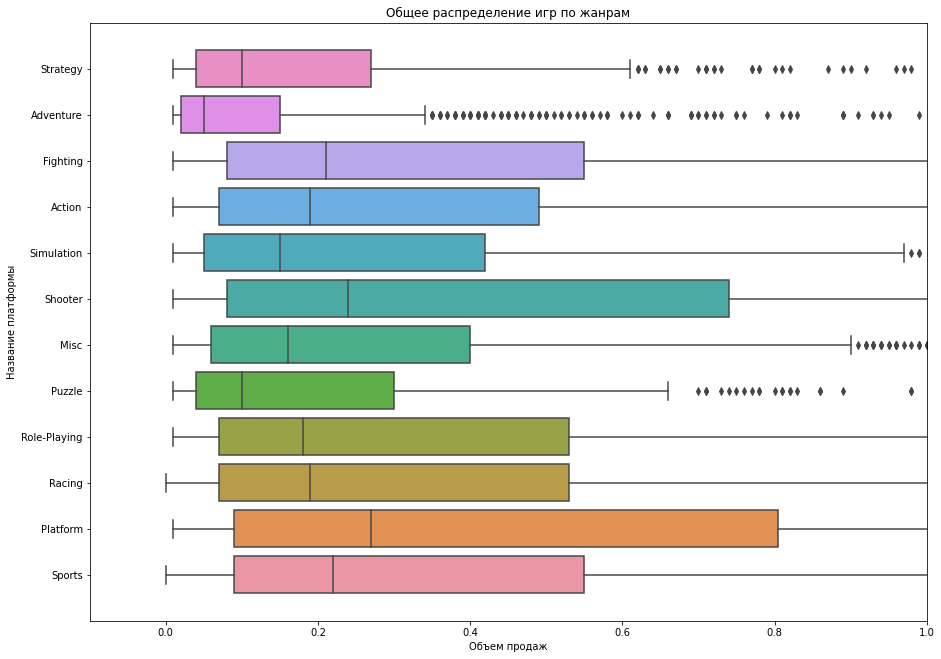

In [58]:
plt.figure(figsize=(15, 11))
sns.boxplot(x='full', y='genre', data=data);
plt.xlim(-0.1, 1)
plt.ylim(-1, 12)

plt.title('Общее распределение игр по жанрам')
plt.xlabel('Объем продаж')
plt.ylabel('Название платформы')
plt.show()

Из построенного графика делаю вывод, что самые прибыльные жанры это **platform** и **shooter**.  
Жанры с самыми низкими продажами это **adventure** и **strategy**. 

### Шаг 4. Составьте портрет пользователя каждого региона.

#### 4.1

In [59]:
top = data_34.groupby(['platform']).agg({'full':'sum'}).sort_values(by='full', ascending=False)
print(top.head(5))

            full
platform        
PS4       288.15
XOne      140.36
3DS        86.68
PS3        68.18
X360       48.22


Сделал выборку и определил Топ-5 платформ за 2013-2015 годы. Лидирующие позиции по продажам занимают платформы PS4 и XOne.

In [60]:
top_platform = data_34.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales','other_sales'],\
                         aggfunc='sum').sort_values(by=['na_sales','eu_sales','jp_sales','other_sales'], ascending=False)
print(top_platform.head(5))

          eu_sales  jp_sales  na_sales  other_sales
platform                                           
PS4         130.04     15.02     98.61        44.48
XOne         46.25      0.32     81.27        12.52
X360         15.49      0.08     28.30         4.35
3DS          16.12     44.24     22.64         3.68
PS3          25.54     11.22     22.05         9.37


Построил таблицу и отсортировал данные, самые популярные платформы PS4, XOne, X360, 3DS, PS3.  
Лидирующие позиции по продажам в Европе и Северной Америке занимает платформа PS4.  
В Японии лидирует платформа 3DS.  
По другим продажама картина аналогична Европе и Северной Америке.  

#### 4.2

In [61]:
top_genre = data_34.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales','other_sales'],\
                         aggfunc='sum').sort_values(by=['na_sales','eu_sales','jp_sales','other_sales'], ascending=False)
print(top_genre.head(5))

              eu_sales  jp_sales  na_sales  other_sales
genre                                                  
Shooter          65.52      4.87     79.02        21.53
Action           74.68     29.58     72.53        22.57
Sports           45.73      3.26     46.13        14.36
Role-Playing     28.17     31.16     33.47         8.64
Misc             12.86      5.61     15.05         4.03


Построил таблицу и отсортировал данные, самые популярные жанры Shooter, Action, Sports, Role-Playing, Misc.  
Не смотря на то, что самые популярные жанры являются Action, Shooter, Sports, для Японского рынка мы видим для них значительное снижение по продажам. Самым популярным жанром для Японии является RPG.  
По остальным странам я не наблюдаю отклонений.

#### 4.3

In [62]:
esrb = data.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales','other_sales'],\
                         aggfunc='sum').sort_values(by=['na_sales','eu_sales','jp_sales','other_sales'], ascending=False)
print(esrb.head(5))

        eu_sales  jp_sales  na_sales  other_sales
rating                                           
E         703.87    197.96   1274.24       231.54
abc       609.65    836.74   1225.84       149.87
T         421.79    150.70    747.60       152.99
M         480.00     63.58    742.89       176.06
E10+      183.35     40.20    345.50        71.93


Построил таблицу и отсортировал данные, самые высокие продажи в зависимости от рейтинга в Северной Америке, на втором месте рейтинга расположился Европейский рынок.  
По Японскому рынку видим опять низкие показатели уровня продаж.

### Шаг 5. Проверьте гипотезы.

#### 5.1 Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H₁ - Средние пользовательские рейтинги платформ Xbox One и PC разные.  
alpha = 0.05

In [63]:
xone = data.loc[data.platform == 'XOne', 'user_score']
pc = data.loc[data.platform == "PC", 'user_score']
results = st.ttest_ind(xone, pc, equal_var=False, nan_policy='omit')
alpha = 0.05
print(results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print('Средние оценки Xone:', xone.mean())
print('Средние оценки PC:', pc.mean())

0.007971393044077884
Отвергаем нулевую гипотезу

Средние оценки Xone: 6.0927461139896355
Средние оценки PC: 6.57437810945275


#### 5.1 Средние пользовательские рейтинги жанров Action и Sports разные

H₀ - Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
H₁ - Средние пользовательские рейтинги жанров Action и Sports разные.  
alpha = 0.05

In [64]:
action = data.loc[data.genre == 'Action', 'user_score']
sports = data.loc[data.genre == "Sports", 'user_score']
results = st.ttest_ind(action, sports, equal_var=False, nan_policy='omit')
alpha = 0.05
print(results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print('Средние оценки Action:', action.mean())
print('Средние оценки Sports:', sports.mean())

1.0308556573899677e-13
Отвергаем нулевую гипотезу

Средние оценки Action: 5.687800369685761
Средние оценки Sports: 4.780430396772025


H₀ - сформирована на основе заданий.  
H₁ - альтернативная гипотеза двухсторонняя.  
alpha = 0.05  
Для проверки гипотез нам подходит st.ttest_ind равенство двух средних совокупностей.

### Шаг 6. Общий вывод.

#### В результате проделанной работы я определил:  
- период в который выпускалось больше всего игр для всех платформ;  
- определил Топ-10 платформ с самым высоким количеством продаж игр за весь период;  
- построил и проанализировал график распределения продаж за разные годы для Топ-10 платформ;  
- определил средний срок появления новых и исчезновения старых платформ;  
- определил, как продавались игры по платформам с 2014 – 2016 год. Построил и проанализировал графики;  
- определил две потенциально прибыльные платформы;  
- построил графики и сравнил как на продажу игр влияли оценки пользователей и критиков;  
- посчитал корреляции и сделал выводы;  
- определили самые прибыльные жанры и жанры с низким уровнем продаж. Построил графики и сделал выводы;  
- определил Топ-5 платформ для различных рынков продаж;  
- определил Топ-5 жанров самые продаваемых игр для различных рынков продаж;  
- проверил как рейтинг ESRB влияет на уровень продаж игр;  
- в финальной части проекта я сформировал и проверил две гипотезы.  
#### Делая прогноз по продажам игр на 2017 год, я бы выбрал:  
1. в качестве платформы PS4 и XOne;  
2. в качестве рынка сбыта Северная Америка и Европа;  
3. сделал прогноз о том, что наиболее продаваемыми будут игры в жанре Shooter и Action.   